In [3]:
import numpy as np
import matplotlib.pyplot as pltm
import random
import sklearn.datasets as skdata
dirData = 'Data/'

# Regression Data

## Sinc with uniform error [-0.1, 0.1]

In [4]:
def genSinc1(N, x0, xN, n0, nN):
    eps = 1e-30
    x = np.linspace(x0, xN, num=N)
    y = np.sin(x) / (x + eps) + np.random.uniform(low = n0, high = nN, size = N)
    return x, y    

In [5]:
N_tr = 100
N_tst = 1000
X_tr, Y_tr = genSinc1(N_tr, -10, 10, -0.1, 0.1)
X_ts, Y_ts = genSinc1(N_tst, -10, 10, -0.1, 0.1)

## Sinc with Gaussian error (sigma = 0.1)

In [6]:
def genSinc2(N, x0, xN, sigma):
    eps = 1e-30
    x = np.linspace(x0, xN, num=N)
    y = np.sin(x) / (x + eps) + np.random.normal(loc = 0, scale = sigma, size = N)
    return x, y  

In [7]:
N_tr = 100
N_tst = 1000
X_tr, Y_tr = genSinc2(N_tr, -10, 10, 0.1)
X_ts, Y_ts = genSinc2(N_tst, -10, 10, 0.1)

## Friedman function 1

In [8]:
def Friedman1(N):
    eps = 1e-30
    x1 = np.linspace(0, 100, num = N)
    x2 = np.linspace(40*np.pi, 560*np.pi, num = N)
    x3 = np.linspace(0, 1, num = N)
    x4 = np.linspace(1, 11, num = N)
    y_squared = x1**2 + (x2*x3 - 1/(x2*x4 + eps))**2 + eps
    y = np.sqrt(y_squared)
    x = np.zeros((N,4))
    x[:,0] = x1
    x[:,1] = x2
    x[:,2] = x3
    x[:,3] = x4
    sigma = np.sqrt(np.var(y)) / 3
    y = y + np.random.normal(loc = 0, scale = sigma, size = N)
    return x,y

## Boston Dataset

In [9]:
boston_housing = skdata.load_boston()
X = boston_housing.data
Y = boston_housing.target

# First data for classification: Ripley mixture model

In [10]:
# We load the Ripley mixture model dataset
file = dirData + 'ripley.txt'
data = np.loadtxt(file, skiprows=1)
X = data[:,0:2]
Y = data[:,2]
# We put the 0-class to -1-class to adjust to our notation
Y[Y == 0] = -1
# We finally select only 100 points (to follow Tipping paper)
index1 = random.sample(range(0, 499), 50)
index2 = random.sample(range(500, 1000), 50)
index = np.hstack((index1, index2))
X = X[index]
Y = Y[index]

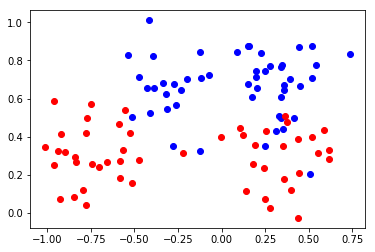

In [44]:
classA = X[Y == 1]
classB = X[Y == -1]

plt.plot(classA[:,0], classA[:,1], 'bo')
plt.plot(classB[:,0], classB[:,1], 'ro')

plt.show()

## U.S.P.S Dataset

In [23]:
# Load file content
training_file = dirData + '/zip.train'
test_file = dirData + '/zip.test'
train_data = np.loadtxt(training_file)
test_data = np.loadtxt(test_file)
# Seperate to input and output
X_tr = train_data[:, 1:train_data.shape[1]]
Y_tr = train_data[:,0] 
X_ts = test_data[:, 1:test_data.shape[1]]
Y_ts = test_data[:,0] 

print(X_tr)
print(Y_tr)
print(X_ts)
print(Y_ts)


[[-1.    -1.    -1.    ..., -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ..., -0.671 -0.828 -1.   ]
 [-1.    -1.    -1.    ..., -1.    -1.    -1.   ]
 ..., 
 [-1.    -1.    -1.    ..., -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ..., -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ..., -1.    -1.    -1.   ]]
[ 6.  5.  4. ...,  3.  0.  1.]
[[-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 ..., 
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]]
[ 9.  6.  3. ...,  4.  0.  1.]


# Set of datasets for regression

# Set of datasets for classification